In [46]:
%matplotlib notebook

In [47]:
from sqlalchemy import create_engine
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
%matplotlib inline

In [48]:
host_ip = subprocess.run("route -n | awk '/UG[ \t]/{print $2}'", capture_output=True, shell=True, text=True).stdout.rstrip()

In [49]:
ssl_args = {
    "ssl_ca": "/training/mysql-ca/ca.pem",
    "ssl_cert": "/training/mysql-ca/client-cert.pem",
    "ssl_key": "/training/mysql-ca/client-key.pem",
}

engine = create_engine(f"mysql+mysqlconnector://student:Student12#$@{host_ip}/ECGnet_new",
                        connect_args=ssl_args)

QUERY = """
    SELECT d.Diagnosis, rd.SampleBase
    FROM DiagnosisTable d
    INNER JOIN RhythmWaveformData rd ON rd.TestID = d.TestID
    WHERE rd.SampleBase = 500;
"""

table_df = pd.read_sql_query(
    QUERY,
    con=engine
)

In [50]:
diagnosis = table_df[~pd.isnull(table_df['Diagnosis'])]['Diagnosis']

In [51]:
len(diagnosis.unique())

115288

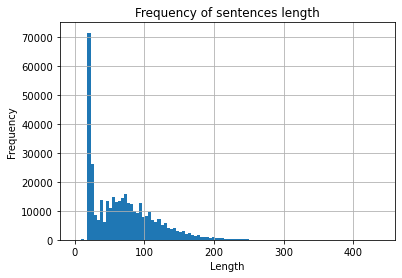

In [52]:
diagnosis.apply(len).hist(bins=100)
plt.ylabel('Frequency')
plt.xlabel('Length')
plt.title('Frequency of sentences length')
plt.show()
# binned = np.histogram(diagnosis.apply(len).values, bins=100)

In [54]:
corpus = diagnosis.str.cat()

In [116]:
cnt = Counter(corpus.split(" "))
del cnt[''], cnt[',']

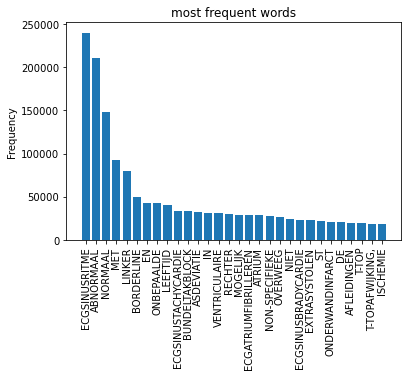

In [124]:
plt.bar(*list(zip(*cnt.most_common(30))))
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('most frequent words')
plt.show()

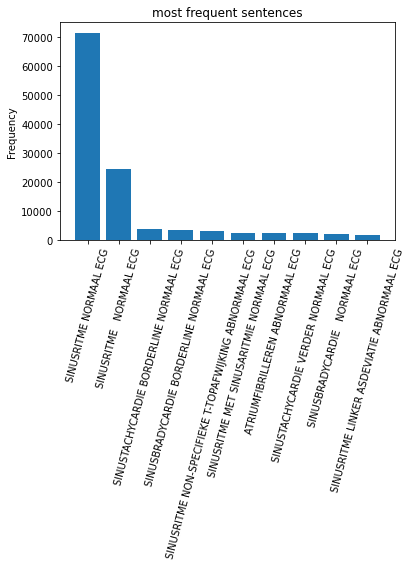

In [132]:
plt.bar(*list(zip(*Counter(diagnosis).most_common(10))))
plt.xticks(rotation=75)
plt.ylabel('Frequency')
plt.title('most frequent sentences')
plt.show()

In [128]:
Counter(diagnosis).most_common(30)

[('SINUSRITME NORMAAL ECG', 71518),
 ('SINUSRITME   NORMAAL ECG', 24282),
 ('SINUSTACHYCARDIE BORDERLINE NORMAAL ECG', 3839),
 ('SINUSBRADYCARDIE BORDERLINE NORMAAL ECG', 3326),
 ('SINUSRITME NON-SPECIFIEKE T-TOPAFWIJKING ABNORMAAL ECG', 2862),
 ('SINUSRITME MET SINUSARITMIE NORMAAL ECG', 2264),
 ('ATRIUMFIBRILLEREN ABNORMAAL ECG', 2201),
 ('SINUSTACHYCARDIE VERDER NORMAAL ECG', 2167),
 ('SINUSBRADYCARDIE   NORMAAL ECG', 2049),
 ('SINUSRITME LINKER ASDEVIATIE ABNORMAAL ECG', 1665),
 ('ATRIUMFIBRILLEREN MET SNELLE VENTRICULAIRE FREQUENTIE ABNORMAAL ECG', 1653),
 ('SINUSRITME RECHTER BUNDELTAKBLOCK ABNORMAAL ECG', 1559),
 ('SINUSRITME NIET SPECIFIEKE ST- EN T-TOP AFWIJKING ABNORMAAL ECG', 1538),
 ('SINUSRITME LINKER BUNDELTAKBLOCK ABNORMAAL ECG', 1489),
 ('SINUSRITME VERLENGD QT-INTERVAL!!! ABNORMAAL ECG', 1292),
 ('SINUSRITME NON-SPECIFIEKE ST-AFWIJKING ABNORMAAL ECG', 1170),
 ('SINUSRITME ONDERWANDINFARCT , ONBEPAALDE LEEFTIJD ABNORMAAL ECG', 1161),
 ('SINUSBRADYCARDIE NORMAAL ECG', 11